In [2]:
import tensorflow as tf

In [3]:
s = tf.InteractiveSession()

# Tensorflow teaser
implement a tensorflow function to compute the sum of squares of numbers from 0 to N-1

In [6]:
N = tf.placeholder("int64", name = "input_to_your_function")

result = tf.reduce_sum(tf.range(N)**2)

In [11]:
%%time
print(s.run(result, {N:10**8}))
# print(result.eval, {N:10**8})

662921401752298880
CPU times: user 660 ms, sys: 350 ms, total: 1.01 s
Wall time: 582 ms


# The way tensorflow works
1. define placeholders where we will send inputs
2. make symbolic graph: a recipe for mathematical transformation of those placeholders
3. compute outputs of the graph with particular values for each placeholder
 * output.eval({placeholder:value})
 * s.run(output, {placeholder:value})
4. So far there are 2 entities mentiones, the transormations is like the way numbers compute in numpy, :
     * a+b, a/b, a**b
     * np.mean -> tf.reduce_mean
     * np.arange -> tf.range
     * np.cumsum -> tf.cumsum

## placeholders 

In [12]:
arbitrary_inputs = tf.placeholder("float32")
input_vector = tf.placeholder("float32", shape = (None,))
fixed_vector = tf.placeholder("int32", shape = (10,))    #10 elements
input_matrix = tf.placeholder("float32", shape = (None, 15))    #15 columns

In [13]:
#multiplication
double_the_vector = input_vector * 2

elementwise_cosine = tf.cos(input_vector)

vector_squares = input_vector**2 - input_vector

In [15]:
#practice
my_vec1 = tf.placeholder("float32")
my_vec2 = tf.placeholder("float32")

my_transformation = my_vec1 * my_vec2 / tf.sin(my_vec1 + 1)
print(my_transformation)

Tensor("truediv:0", dtype=float32)


In [18]:
import numpy as np
dummy = np.arange(5).astype("float32")
s.run(my_transformation, {my_vec1:dummy, my_vec2:dummy[::-1]})

array([  0.        ,   3.2992506 ,  28.34467125,  -3.964046  ,  -0.        ], dtype=float32)

# Visualizing graph


In [26]:

input1 = tf.constant([1,2,3], dtype="float32")
input2 = tf.Variable(tf.random_uniform([3]), dtype="float32")
output = tf.add_n([input1, input2], name = "add")
# show graph to tensorboard
writer = tf.summary.FileWriter("./tboard", graph=tf.get_default_graph())
writer.close()

In [27]:
!pwd

/root/coursera/PycharmProjects/coursera/new


In [32]:
import os
os.system("tensorboard --logdir = ./tboard --port = 6006 &" )

0

# variables


In [33]:
shared_vector_1 = tf.Variable(initial_value=np.ones(5))
s.run(tf.global_variables_initializer())

print('initial value', s.run(shared_vector_1))


initial value [ 1.  1.  1.  1.  1.]


In [36]:
#assign new values
s.run(shared_vector_1.assign(np.arange(5)))
print("new value", s.run(shared_vector_1))

new value [ 0.  1.  2.  3.  4.]


# tf.gradients  

In [38]:
my_scalar = tf.placeholder("float32")

scalar_squared = my_scalar ** 2

derivative = tf.gradients(scalar_squared, my_scalar)[0]
print(derivative)

Tensor("gradients_1/pow_4_grad/Reshape:0", dtype=float32)


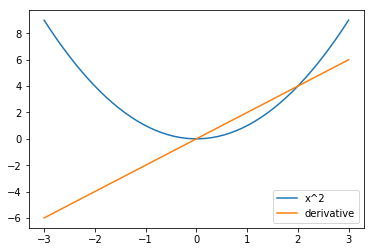

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3,3)
x_squared, x_squared_der = s.run([scalar_squared, derivative], {my_scalar:x})

plt.plot(x,x_squared, label = "x^2")
plt.plot(x, x_squared_der, label = "derivative")
plt.legend()

In [41]:
# another example
my_vector = tf.placeholder("float32", [None])
my_scalar = tf.placeholder("float32")
weird_function = tf.reduce_mean((my_vector+my_scalar)**(1+tf.nn.moments(my_vector,[0])[1]) + 1./ tf.atan(my_scalar))/(my_scalar**2 + 1) + 0.01*tf.sin(2*my_scalar**1.5)*(tf.reduce_sum(my_vector)* my_scalar**2)*tf.exp((my_scalar-4)**2)/(1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2))/(1+tf.exp(-(my_scalar-4)**2)))**2

der_by_scalar = tf.gradients(weird_function, my_scalar)
der_by_vector = tf.gradients(weird_function, my_vector)

In [43]:
scalar_space = np.linspace(1,7,100)
y = [s.run(weird_function, {my_scalar:x, my_vector:[1,2,3]}) for x in scalar_space]

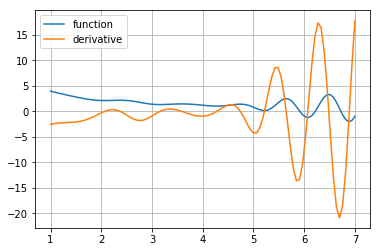

In [45]:

plt.plot(scalar_space, y, label = "function")
y_der_by_scalar = [s.run(der_by_scalar, {my_scalar:x, my_vector:[1,2,3]}) for x in scalar_space]

plt.plot(scalar_space, y_der_by_scalar, label = "derivative")
plt.grid()
plt.legend()

# optimizers 

In [46]:
y_guess = tf.Variable(np.zeros(2, dtype="float32"))
y_true = tf.range(1,3, dtype="float32")

loss = tf.reduce_mean((y_guess - y_true + tf.random_normal([2]))**2)
optimizer = tf.train.MomentumOptimizer(0.01, 0.9).minimize(loss, var_list = y_guess)


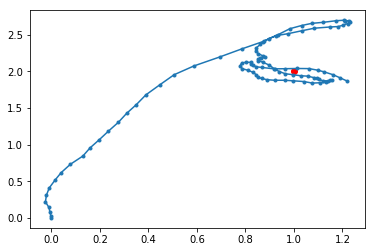

In [47]:
from IPython.display import clear_output
s.run(tf.global_variables_initializer())

guesses = [s.run(y_guess)]
for _ in range(100):
    s.run(optimizer)
    guesses.append(s.run(y_guess))
    
    clear_output(True)
    plt.plot(*zip(*guesses), marker = '.')
    plt.scatter(*s.run(y_true), c = "red")
    plt.show()

# Logistic regression example

In [4]:
from sklearn.datasets import load_digits
mnist = load_digits(2)
X,y = mnist.data, mnist.target
print(y.shape)
print(X.shape)

(360,)
(360, 64)


In [9]:
print(y[:5])
print(X[1])

[0 1 0 1 0]
[  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.   0.
   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.  16.   2.
   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.   1.  16.  16.
   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.   0.   0.   0.  11.
  16.  10.   0.   0.]


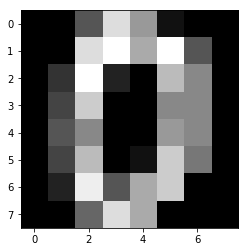

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X[0].reshape(8,8), cmap = "gray")

In [110]:
weights = tf.Variable(initial_value=np.zeros([64,2]), dtype="float32")
input_X = tf.placeholder("float32", shape=(None, 64))    #许多图片, 每张图片64个点
input_y = tf.placeholder("int32", shape=(None))     #每张图片不是0就是1,一维  
print(input_X, input_y, weights)

Tensor("Placeholder_34:0", shape=(?, 64), dtype=float32) Tensor("Placeholder_35:0", dtype=int32) <tf.Variable 'Variable_136:0' shape=(64, 2) dtype=float32_ref>


In [17]:
predicted_y = tf.nn.softmax(tf.matmul(input_X, weights))
print(predicted_y)

predictions = tf.argmax(predicted_y, axis=1)
print(predictions)

y_onehot = tf.one_hot(input_y, 2, dtype="float32")
print(y_onehot)

loss = -tf.reduce_mean(y_onehot * tf.log(predicted_y + 1e-10))
print(loss)

Tensor("Softmax:0", shape=(?, 2), dtype=float32)
Tensor("ArgMax:0", shape=(?,), dtype=int64)
Tensor("one_hot:0", dtype=float32)
Tensor("Neg:0", shape=(), dtype=float32)


In [18]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
print(optimizer)

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable_3/ApplyGradientDescent"



In [58]:
from sklearn.utils import shuffle
def train_function(X, y):
    num_samples = X.shape[0]
    batch_size = 20
    X, y = shuffle(X, y)
    
    losses = []
    for i in range(0, num_samples, batch_size):
        end = min(i + batch_size, num_samples)
        batch_xs, batch_ys = X[i:end], y[i:end]
        
        _, l = sess.run([optimizer, loss], feed_dict={input_X: batch_xs, input_y: batch_ys})
        losses.append(l)
    return np.mean(losses)

In [46]:
def predict_function(X):
    preds = sess.run([predictions], feed_dict = {input_X: X})
    return(np.array(preds).reshape(-1,))      #[1,0,1,0....]

In [47]:
init = tf.global_variables_initializer()

with tf.Session() as s:
    s.run(init)
    for epoch in range(10):
        mean_loss = train_function(X, y)
        print(mean_loss)
print("Optimization Finished")

0.129193
0.00504077
0.00405025
0.00341731
0.00282569
0.00255229
0.00228098
0.00204358
0.00194247
0.00171492
Optimization Finished


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
print(y_train.shape)

(270,)


loss at iter {}:{}.format(i, loss_i)
train auc: 1.0
test auc: 1.0
loss at iter {}:{}.format(i, loss_i)
train auc: 1.0
test auc: 1.0
loss at iter {}:{}.format(i, loss_i)
train auc: 1.0
test auc: 1.0
loss at iter {}:{}.format(i, loss_i)
train auc: 1.0
test auc: 1.0
loss at iter {}:{}.format(i, loss_i)
train auc: 1.0
test auc: 1.0
resulting weights:


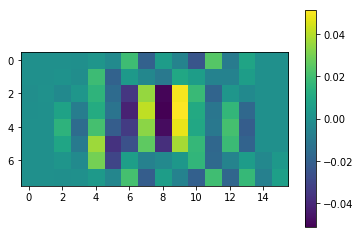

In [59]:
from sklearn.metrics import roc_auc_score

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(5):
        loss_i = train_function(X_train, y_train)
        print("loss at iter {}:{}.format(i, loss_i)")
        print("train auc:", roc_auc_score(y_train, predict_function(X_train)))
        print("test auc:", roc_auc_score(y_test, predict_function(X_test)))
    print("resulting weights:")
    plt.imshow(sess.run(weights).reshape(8,-1))
    plt.colorbar()


# Bonus: my1stNN 

In [71]:
!pwd

/Users/ch/PycharmProjects/coursera/new


In [152]:
import numpy as np
f = np.load("./MNIST_data/mnist.npz")


In [153]:
X, y, X_test, y_test = f["x_train"], f["y_train"], f["x_test"], f["y_test"]

In [154]:
X_val = X[:10000]
y_val = y[:10000]
X_train = X[10000:]
y_train = y[10000:]
print(X.shape, X_train.shape, X_val.shape)
print(y.shape, y_train.shape, y_val.shape)

(60000, 28, 28) (50000, 28, 28) (10000, 28, 28)
(60000,) (50000,) (10000,)


3


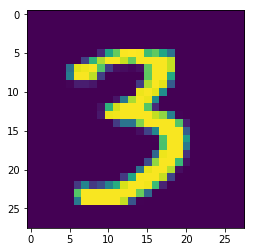

In [155]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(y_train[0])

In [156]:
sum = 0
for i in range(10):
    sum = np.sum(y_train == i)
    print("{}:{}".format(i, sum))
print(28*28)

0:4922
1:5615
2:4967
3:5099
4:4862
5:4558
6:4904
7:5195
8:4907
9:4971
784


In [157]:
def flatten(X):
    return X.reshape(X.shape[0], X.shape[1]*X.shape[2])

In [158]:
X_train = flatten(X_train)
print(X_train.shape)

(50000, 784)


In [160]:
X_val = flatten(X_val)
X_test = flatten(X_test)

In [161]:
y_test.shape == (10000,)

True

In [162]:
print(X_val.shape)
print(X_test.shape)

(10000, 784)
(10000, 784)


In [163]:
n_labels = 10
n_pixels = 28*28
n_neurons = 200

In [164]:
X_train.shape

(50000, 784)

In [165]:
#2 layers
W1 = tf.Variable(initial_value = np.sqrt(1/n_pixels) * np.random.randn(n_pixels, n_neurons), dtype="float32")
b1 = tf.Variable(initial_value = np.zeros([n_neurons]), dtype = "float32")

W2 = tf.Variable(initial_value = np.sqrt(1/n_neurons) * np.random.randn(n_neurons, n_neurons), dtype="float32")
b2 = tf.Variable(initial_value = np.zeros([n_neurons]), dtype = "float32")

W = tf.Variable(initial_value = np.random.randn(n_neurons, n_labels),dtype="float32")
b = tf.Variable(initial_value = np.zeros([n_labels], dtype="float32"))

input_X = tf.placeholder("float32", shape=(None, n_pixels))
input_y = tf.placeholder("uint8", shape = (None,))

#one layer
weights = tf.Variable(initial_value=np.zeros([n_pixels, n_labels]), dtype="float32")
biases = tf.Variable(initial_value=np.zeros([n_labels]), dtype = "float32")

print(input_X)
print(input_y)
print(W1, b1, W2.shape, b2.shape, W.shape, b.shape, weights.shape, biases.shape)

Tensor("Placeholder_48:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_49:0", shape=(?,), dtype=uint8)
<tf.Variable 'Variable_185:0' shape=(784, 200) dtype=float32_ref> <tf.Variable 'Variable_186:0' shape=(200,) dtype=float32_ref> (200, 200) (200,) (200, 10) (10,) (784, 10) (10,)


## Single layer network 

In [166]:
#computation graph
prediction_y = tf.nn.softmax(tf.matmul(input_X, weights) + biases)
print(prediction_y)
predictions = tf.argmax(prediction_y, axis=1)   # the label of the biggest softmax value
print(predictions)

Tensor("Softmax_8:0", shape=(?, 10), dtype=float32)
Tensor("ArgMax_8:0", shape=(?,), dtype=int64)


In [167]:
y_onehot = tf.one_hot(input_y, n_labels, dtype="float32")
print(y_onehot)

loss = -tf.reduce_mean(y_onehot * tf.log(prediction_y + 1e-10))
print(loss)

optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)
print(optimizer)

Tensor("one_hot_4:0", shape=(?, 10), dtype=float32)
Tensor("Neg_6:0", shape=(), dtype=float32)
name: "Adam_4"
op: "NoOp"
input: "^Adam_4/update_Variable_191/ApplyAdam"
input: "^Adam_4/update_Variable_192/ApplyAdam"
input: "^Adam_4/Assign"
input: "^Adam_4/Assign_1"



In [168]:
from sklearn.utils import shuffle

def train_function(X, y):
    num_samples = X.shape[0]
    batch_size = 20
    X, y = shuffle(X, y)
    losses = []
    for i in range(0, num_samples, batch_size):
        end = min(i+batch_size, num_samples)
        X_batch = X[i:end]
        y_batch = y[i:end]
        _, l = sess.run([optimizer, loss], feed_dict = {input_X: X_batch, input_y: y_batch})
        losses.append(l)
    return np.mean(losses)

def predict_functions(X):
    preds = sess.run([predictions], feed_dict = {input_X: X})
    return np.array(preds).reshape(-1, 1)

## 2 hidden layer network 

In [169]:
z1 = tf.matmul(input_X, W1) + b1
z2 = tf.sigmoid(z1)

z3 = tf.matmul(z2, W2) + b2
z4 = tf.sigmoid(z3)

nn_prediction_y = tf.nn.softmax(tf.matmul(z4, W)+b)
print(nn_prediction_y)

nn_predictions = tf.argmax(nn_prediction_y, axis = 1)
print(nn_predictions)

nn_loss = -tf.reduce_mean(y_onehot * tf.log(nn_prediction_y + 1e-10))

reg = (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2))
nn_loss = nn_loss + 1e-5 * reg

print(nn_loss)

nn_optimizer = tf.train.MomentumOptimizer(0.2, 0.95).minimize(nn_loss)
print(nn_optimizer)

Tensor("Softmax_9:0", shape=(?, 10), dtype=float32)
Tensor("ArgMax_9:0", shape=(?,), dtype=int64)
Tensor("add_38:0", shape=(), dtype=float32)
name: "Momentum_2"
op: "NoOp"
input: "^Momentum_2/update_Variable_185/ApplyMomentum"
input: "^Momentum_2/update_Variable_186/ApplyMomentum"
input: "^Momentum_2/update_Variable_187/ApplyMomentum"
input: "^Momentum_2/update_Variable_188/ApplyMomentum"
input: "^Momentum_2/update_Variable_189/ApplyMomentum"
input: "^Momentum_2/update_Variable_190/ApplyMomentum"



In [170]:
def nn_train_function(X, y):
    losses = []
    batch_size = 256
    num_samples = X.shape[0]
    for i in range(0, num_samples, batch_size):
        end = min(i+batch_size, num_samples)
        X_batch, y_batch = X[i:end], y[i:end]
        _, loss = sess.run([nn_optimizer, nn_loss], feed_dict = {input_X: X_batch, input_y: y_batch})
        losses.append(loss)
    return np.mean(losses)   # average cross entropy loss for this epoch
def nn_predict_functions(X):
    y = sess.run([nn_predictions], feed_dict = {input_X: X})
    return np.array(y).reshape(-1,1)

## Run the network 
### Single layer network

In [147]:
init = tf.global_variables_initializer()

def count_acc(preds, y):
    count = 0
    for (i,j) in zip(preds, y):
        if i == j:
            count += 1
    return count/len(y)
with tf.Session() as sess:
    sess.run(init)
    val_acc_es = [0]
    for i in range(100):
        print("iteration {}: \n".format(i))
        loss_i = train_function(X_train, y_train)
        print("Train loss is {}\n".format(loss_i))
        preds = predict_functions(X_train)
        train_acc = count_acc(preds, y_train)
        print("Train acc is {}\n".format(train_acc))
        
        preds = predict_functions(X_val)
        val_acc = count_acc(preds, y_val)
        val_acc_es.append(val_acc)
        print("Val acc is {}\n".format(val_acc))
        if ((i > 10) and (val_acc < val_acc_es[-2])):
            break
    preds = predict_functions(X_test)
    test_acc = np.sum(preds == y_test)/y_test.shape[0]
    print("test acc:", count_acc(preds, y_test))

iteration 0: 

Train loss is 0.6671380996704102

Train acc is 0.71654

Val acc is 0.7206

iteration 1: 

Train loss is 0.619046688079834

Train acc is 0.73352

Val acc is 0.7375

iteration 2: 

Train loss is 0.5927603244781494

Train acc is 0.81404

Val acc is 0.8207

iteration 3: 

Train loss is 0.41147685050964355

Train acc is 0.8297

Val acc is 0.8311

iteration 4: 

Train loss is 0.39046424627304077

Train acc is 0.82794

Val acc is 0.8335

iteration 5: 

Train loss is 0.3939366340637207

Train acc is 0.83412

Val acc is 0.84

iteration 6: 

Train loss is 0.3816531300544739

Train acc is 0.8385

Val acc is 0.844

iteration 7: 

Train loss is 0.37999770045280457

Train acc is 0.83484

Val acc is 0.8402

iteration 8: 

Train loss is 0.37662172317504883

Train acc is 0.8359

Val acc is 0.8391

iteration 9: 

Train loss is 0.378411203622818

Train acc is 0.82924

Val acc is 0.8332

iteration 10: 

Train loss is 0.37470003962516785

Train acc is 0.8424

Val acc is 0.8469

iteration 11:

### 2 hidden layer network 

In [148]:
y_train

array([3, 8, 7, ..., 5, 6, 8], dtype=uint8)

In [171]:
init = tf.global_variables_initializer()

def count_acc(preds, y):
    count = 0
    for (i,j) in zip(preds, y):
        if i == j:
            count += 1
    return count/len(y)
with tf.Session() as sess:
    sess.run(init)
    val_acc_es = [0]
    for i in range(400):
        print("iteration {}: \n".format(i))
        loss_i = nn_train_function(X_train, y_train)
        print("Train loss is {}\n".format(loss_i))
        preds = nn_predict_functions(X_train)
        train_acc = count_acc(preds, y_train)
        print("Train acc is {}\n".format(train_acc))
        preds = nn_predict_functions(X_val)
        val_acc = count_acc(preds, y_val)
        val_acc_es.append(val_acc)
        print("Val acc is {}\n".format(val_acc))
        if ((i > 100) and (val_acc < val_acc_es[-2])):
            break
    preds = nn_predict_functions(X_test)
    test_acc = np.sum(preds == y_test)/y_test.shape[0]
    print("test acc:", count_acc(preds, y_test))

iteration 0: 

Train loss is 0.09635429829359055

Train acc is 0.78972

Val acc is 0.7928

iteration 1: 

Train loss is 0.06897803395986557

Train acc is 0.82602

Val acc is 0.8345

iteration 2: 

Train loss is 0.07274240255355835

Train acc is 0.77138

Val acc is 0.7684

iteration 3: 

Train loss is 0.067449651658535

Train acc is 0.79634

Val acc is 0.8008

iteration 4: 

Train loss is 0.06590472161769867

Train acc is 0.81788

Val acc is 0.8197

iteration 5: 

Train loss is 0.06254507601261139

Train acc is 0.8343

Val acc is 0.835

iteration 6: 

Train loss is 0.0630946233868599

Train acc is 0.84236

Val acc is 0.8455

iteration 7: 

Train loss is 0.05853781849145889

Train acc is 0.8082

Val acc is 0.8089

iteration 8: 

Train loss is 0.06004544720053673

Train acc is 0.86266

Val acc is 0.8636

iteration 9: 

Train loss is 0.057782240211963654

Train acc is 0.84416

Val acc is 0.8463

iteration 10: 

Train loss is 0.05863364785909653

Train acc is 0.85032

Val acc is 0.852

iter

Train acc is 0.90054

Val acc is 0.9048

iteration 90: 

Train loss is 0.04979845881462097

Train acc is 0.91526

Val acc is 0.9117

iteration 91: 

Train loss is 0.049024179577827454

Train acc is 0.91094

Val acc is 0.9127

iteration 92: 

Train loss is 0.04833725467324257

Train acc is 0.91002

Val acc is 0.9138

iteration 93: 

Train loss is 0.04899623617529869

Train acc is 0.91168

Val acc is 0.9099

iteration 94: 

Train loss is 0.04837197810411453

Train acc is 0.91942

Val acc is 0.9163

iteration 95: 

Train loss is 0.04780733212828636

Train acc is 0.90998

Val acc is 0.907

iteration 96: 

Train loss is 0.050488509237766266

Train acc is 0.90748

Val acc is 0.9065

iteration 97: 

Train loss is 0.0503598228096962

Train acc is 0.90772

Val acc is 0.9111

iteration 98: 

Train loss is 0.04838893190026283

Train acc is 0.91754

Val acc is 0.9184

iteration 99: 

Train loss is 0.04832988977432251

Train acc is 0.9158

Val acc is 0.913

iteration 100: 

Train loss is 0.05010277